# Trabajo Práctico 1 - Análisis Exploratorio


##### Grupo 36 - Integrantes: Nilda, José y Florencia
---

## 1. Introducción

Jammp es una compañia que hace RBT ... en relacion a la venta de publicidad de telefonos. 
Contar brevemente de que va el trabajo y cada uno de los datasets que aquí esta.

## 2. Análisis Exploratorio
### 2.1 Dataset Auctions

Cada observación o fila del dataset de Auctions presenta una subasta, seleccionada de la base de datos de Jammp entre la fecha xxxx y xxxxx para Uruguay. Es por ello que la columna XXX solo presenta un único valor correspondiente al código de dicho país.

In [38]:
# Leo los archivos con Pandas
auctions = pd.read_csv('E:/Materias/Organizacion_datos_2019/auctions.csv.gzip', 
                       compression = 'gzip',
                       low_memory = False ,
                       dtype = {'country' : 'category' ,'device_id' : 'category', 
                               'platform':'category', 'ref_type_id':'category',
                               'source_id':'category'})
#Explicito el formato de la fecha
auctions['created'] = pd.to_datetime(auctions['created'], format='%Y-%m-%d %H')
#Tengo una primera visión del DataFrame
auctions.head()

Se pudo observar que las subastas registradas se realizaron primariamente mediante la plataforma xxx


In [ ]:
# Aqui grafico sobre esto

### 2.2 Dataset Clicks

El dataset clicks contiene una observación por click que realiza un usuario en la impresion de una publicidad.

In [2]:
# Leo el dataset Clicks
clicks = pd.read_csv('D:/Desktop/Materias/Organizacion_datos_2019/clicks.csv.gzip',
                     compression = 'gzip')

#Explicito el formato de la fecha
clicks['created'] = pd.to_datetime(clicks['created'], format='%Y-%m-%d %H')

#Visualizo
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


Cuando analizamos los advertiser_id evaluamos que la mayoria de los clicks se corresponden con el advertiser 3. No eliminamos los otros datos pero de ahora mas consideramos que los resultados de este dataset son representativos de lo que ocurre con las publicidades de este advertiser que como algo insesgado

In [61]:
# Realizar grafico o tabla que muestre lo de advertiser

In [12]:
import seaborn as sns

#fig,(ax1,ax2) = plt.subplots(1,2)

sns.heatmap(clicks["created"], clicks["advertiser_id"].astype("int64"), cmap="RdBu_r") # <-- axis arg, ax=ax1
#ax1.set_xlabel("Week")
#ax1.set_ylabel("Tolerance")


#sns.heatmap(,cmap="RdBu_r", ax=ax2)
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (26351, 1) and (26351,))

Se observa que la mayoría de los clicks se dio dentro del periodo apartir del día 03-08, existiendo un patron diferente durante el fin de semana que surante las semanas.
(chequear esto)

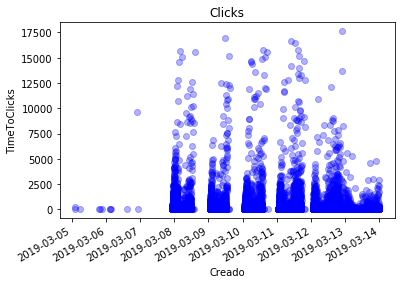

In [36]:
import matplotlib.pyplot as plt

plt.plot_date(clicks['created'], clicks['timeToClick'], fmt="bo", tz=None, xdate=True, alpha=0.3)
#plt.scatter(clicks['created'], alpha=0.5)
plt.gcf().autofmt_xdate() #etiquetas giradas
plt.title('Clicks')
plt.xlabel('Creado')
plt.ylabel('TimeToClick')
plt.show()

Si analizamos por hora podemos ver que la mayoría de los clicks se realizo en la franja horaria entre las X y las X

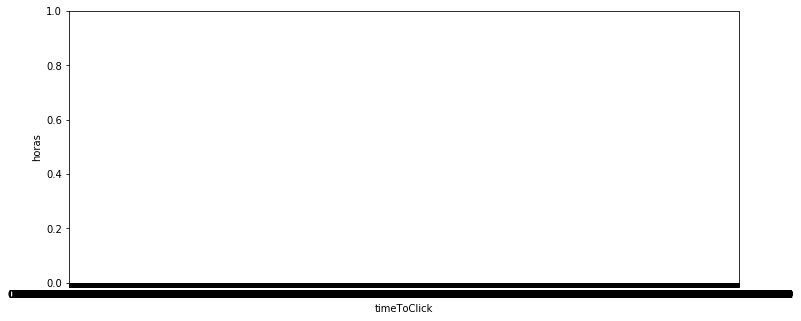

In [3]:
# Grafico analizando por hora

import pandas as pd
import datetime as dt
import seaborn 
import matplotlib.pyplot as plt

clicks["horas"] = clicks['created'].dt.hour
clicks["minutos"] = clicks['created'].dt.minute

ts = pd.Series(clicks['horas'], index=pd.date_range(start= 0, periods=24, freq="H"))

fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(clicks['timeToClick'], ts, ax=ax)


Cuando se analiza la zona dónde se realizaron estos clicks estos ocurrieron en la parte baja de la pantalla del teléfono. Como no sabemos el formato de la publicidad que uso Jammp no podemos saber si esto significa que la mayoría de los clicks se dieron en publicidades de forma rectangular que ese encontraban en la zona inferior o se puede atribuir a que había más publicidades en la zona baja que en cualquier otra. 

Text(0, 0.5, 'Click en el eje horizontal')

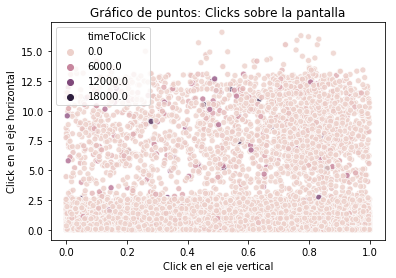

In [34]:
#HEATMAP Screen
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = "touchX",
                y = "touchY", 
                hue = "timeToClick",
                alpha = .8,
                data = clicks)
plt.title('Gráfico de puntos: Clicks sobre la pantalla')
plt.xlabel('Click en el eje vertical')
plt.ylabel('Click en el eje horizontal')

El tiempo desde la impresión de la publicida hasta el click, representado por los valores de la columna timeToClick, fueron en su mayoría bajos tal como se evidencia en el histograma, dónde son pocos frecuentes los valores que superan los XXX seg.

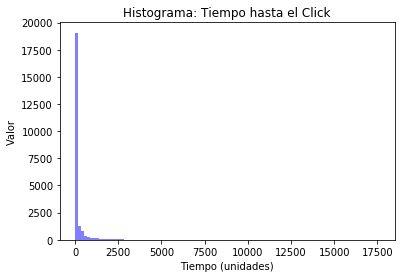

In [36]:
# Histograma de TimeToClicks

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 

num_bins = 100 #cada cuánto geneta una división del histograma
n, bins, patches = plt.hist(clicks["timeToClick"], num_bins, facecolor='blue', alpha=0.5)
plt.title('Histograma: Tiempo hasta el Click')
plt.xlabel('Tiempo (unidades)')
plt.ylabel('Valor')
plt.show()

Es de allí que cuando observamos los valores de time to clicks en la pantalla del telefono los valores elevados de time to click se encuentran dispersos y son minoría como para poder sacar una conclusión al respecto.

### 2.3 Dataset Installs

El dataset Installs representa las instalaciones realizadas por los usuarios, ya sea atribuidas o no a las impresiones de publicidad de Jammp.


In [1]:
#Leo el archivo INSTALLS
import pandas as pd
from datetime import datetime

installs = pd.read_csv("D:/Desktop/Materias/Organizacion_datos_2019/installs.csv.gzip",
                       compression = 'gzip', dtype='object')

#Explicito el formato de la fecha
installs['created'] = installs['created'].astype('datetime64[ns]')

installs.head()


,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


In [20]:
#installs.groupby("implicit")[["attributed"]].sum()
#installs.describe()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
count,3412,3412,3412,3412,0.0,3412,3412,3412,1047,3411,3364,1729,865,865,1729,6,3412,3378
unique,3412,31,2,3008,0.0,1,2,2,27,415,12,334,865,20,2,4,2717,30
top,2019-03-09 04:34:41.291000,7,1891515180541284343,5208834946313176321,NaN,False,False,6333597102633388268,3.083058605577787e+17,2.33194661091417e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,fdd6028c-a86a-44ab-8712-86b80507c570,af_app_opened,true,{hash},1992632945768888579,3.3013777759776993e+18
freq,1,947,2080,4,NaN,3412,2547,1820,472,759,1729,393,1,428,1377,3,33,1484
first,2019-03-05 00:00:38.219000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-13 23:54:00.526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De las instalaciones realizadas el X% fue atribuida a Jampp y el X porciento fue implicita

In [12]:
# veo si hay valores nulos
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [13]:
#instalaicones implicitas en el tiempo
import matplotlib.pyplot as plt
import numpy as np
#plt.scatter(installs['created'], installs['implicit'].astype("int64"), alpha=0.5)
#plt.title('Instalaciones')
#plt.xlabel('Creado')
#plt.ylabel('Instalaciones implícitas')
#plt.show()

#objects = ('Atribuidas a Jammp', "Implícitas")
#y_pos = np.arange(len(objects))


#installs.groupby("implicit").count()

#plt.bar(installs['created'], performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Instalaciones implicitas')
#plt.title('Installs')
 
#plt.show()

ValueError: invalid literal for int() with base 10: 'False'

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create traces
#trace0 = go.Scatter(
#    x = installs[["created"]],
#    y = installs[["ref_hash"]],
#    mode = 'lines',
#    name = 'lines')
#py.iplot(trace0)

ModuleNotFoundError: No module named 'plotly'

TypeError: pivot() got an unexpected keyword argument 'column'

In [37]:
clicks.describe()
#clicks.isnull().sum()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,0.0,26351.000000,2.635100e+04,26351.000000,26351.000000,26340.000000,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,2.991993,NaN,1.245266,6.333597e+18,1.206906,1.070233,7.743812,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.482277,230.403309,0.638784,1.478656,1.888100e+18,4.611581e+18
std,0.164070,NaN,2.188948,2.089000e+05,0.004484,0.001896,7.017027,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583764,976.849149,0.301983,2.622727,1.721252e+17,2.673175e+18
min,0.000000,NaN,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426000,0.183000,1.891515e+18,2.273798e+18
50%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726000,0.645000,1.891515e+18,4.623721e+18
75%,3.000000,NaN,1.000000,6.333597e+18,1.205689,1.070234,13.000000,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.901000,0.991000,1.891515e+18,6.917850e+18
max,8.000000,NaN,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.600000,6.323872e+18,9.221118e+18


### 2.4 Events

Este dataset muestra una observación de la tabla en relacion a las acciones que hace cada usuario dentro de la aplicacion una vez instalada. La información de qué representa cada event_id es confidencial por lo que no podemos discriminar la cantidad de clicks por evento.

In [40]:
events = pd.read_csv('D:/Desktop/Materias/Organizacion_datos_2019/events.csv.gzip', 
                     compression = 'gzip', 
                     low_memory = False, dtype='object')
#Explicito el formato de la fecha
#events['date'] = pd.to_datetime(events['date'], format='%Y-%m-%d %H')
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [ ]:
import matplotlib.pyplot as plt

plt.plot_date(events['date'], events['event_id'], c = events['attributed'], fmt="bo", tz=None, xdate=True, alpha=0.3)
#plt.scatter(clicks['created'], alpha=0.5)
plt.gcf().autofmt_xdate() #etiquetas giradas
plt.title('Events')
plt.xlabel('Date')
plt.ylabel('event_id')
plt.show()

## 3. Conclusiones

Los análisis aquí detallados permiten realizar un estudio del flujo de trabajo de la empresa Jammp en relación a cuatro datasets de Uruguay durante los días XXXX.
Breve descripcion de todo lo que fuimos viendo en cada dataset